In [17]:
#Assignment
#Step1:  Read census Dataset for predict SC percentage and economical status whether poor or not  

# importing required libraries

import csv
import numpy as np
import pandas as pd

#sklearn
from sklearn.datasets import make_classification

#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm,ensemble,naive_bayes,discriminant_analysis,neural_network
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
  
#from sklearn.linear_model import Ridge
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn.metrics import accuracy_score

#for ploting graphs
from matplotlib import pyplot as plt
from matplotlib import rcParams

#from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
# read the census dataset
census_data = pd.read_csv('CensusStatusSC01.csv') 

# shape of the datasets
print('Shape of census data :',census_data.shape) 

Shape of census data : (27, 20)


In [19]:
#data1.head()
census_data.head()

,SNo,State,District,Persons,Males,Females,Growth_1991_2001,Scheduled_Caste_population,Percentage_SC_to_total,Total_Educated,Graduate_and_Above,Total_workers,Non_Workers,Percentage_Non_Workers,Number_of_households,Scheduled_Tribe_population,Percentage_to_total_population_ST,Urbal_Area,Economical_Status,Below_Poverty_Line_Status
0,1,Telangana,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,615219,17.62,1661089,81001,1711559,1780263,50.98,813797,90636,2.60,0,1,1
1,2,Telangana,"District Hyderabad (05), Andhra Pradesh (28)",3829753,1981173,1848580,17.18,289972,7.57,2634949,466744,1119842,2709911,70.76,695906,34560,0.90,1,0,0
2,3,Telangana,"District Warangal (09), Andhra Pradesh (28)",3246004,1644895,1601109,14.63,520024,16.02,1595745,99917,1566237,1679767,51.75,729110,457679,14.10,1,1,1
3,4,Andhra,"District Guntur (17), Andhra Pradesh (28)",4465144,2250279,2214865,7.27,808012,18.10,2455965,175832,2190299,2274845,50.95,1077303,208157,4.66,1,1,0
4,5,Andhra,"District Anantapur (22), Andhra Pradesh (28)",3640478,1859588,1780890,14.31,508531,13.97,1774088,102827,1777536,1862942,51.17,779052,127161,3.49,0,1,1


In [20]:
#Get summary of numerical fields by using describe() function
census_data.describe()

,SNo,Persons,Males,Females,Growth_1991_2001,Scheduled_Caste_population,Percentage_SC_to_total,Total_Educated,Graduate_and_Above,Total_workers,Non_Workers,Percentage_Non_Workers,Number_of_households,Scheduled_Tribe_population,Percentage_to_total_population_ST,Urbal_Area,Economical_Status,Below_Poverty_Line_Status
count,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,2.700000e+01,27.000000,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000
mean,14.037037,1.877969e+06,9.712566e+05,9.067124e+05,23.908519,255860.555556,12.103333,1.022429e+06,83623.740741,7.581025e+05,1.119867e+06,59.300370,3.739597e+05,130734.000000,12.907037,0.444444,0.740741,0.703704
std,7.992696,1.349198e+06,6.906668e+05,6.599993e+05,11.979020,233844.455645,6.908223,7.763432e+05,104420.595498,6.055811e+05,7.906778e+05,7.080037,2.915641e+05,185641.963723,20.045902,0.506370,0.446576,0.465322
min,1.000000,3.892400e+04,2.184600e+04,1.707800e+04,7.270000,66.000000,0.010000,1.533700e+04,785.000000,2.172700e+04,1.719700e+04,44.180000,8.294000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,7.044830e+05,3.649025e+05,3.395805e+05,15.980000,59724.500000,6.660000,3.118730e+05,13328.000000,2.937270e+05,4.444185e+05,52.880000,1.414785e+05,8714.500000,0.860000,0.000000,0.500000,0.000000
50%,14.000000,1.583225e+06,8.151520e+05,7.680730e+05,22.350000,202654.000000,12.840000,8.838600e+05,48484.000000,6.055990e+05,9.776260e+05,61.090000,3.031070e+05,51753.000000,3.490000,0.000000,1.000000,1.000000
75%,20.500000,2.970164e+06,1.586264e+06,1.399988e+06,28.290000,404989.500000,17.860000,1.628417e+06,101372.000000,1.078470e+06,1.821602e+06,63.820000,5.974890e+05,181563.000000,14.725000,1.000000,1.000000,1.000000
max,27.000000,4.465144e+06,2.250279e+06,2.214865e+06,60.120000,808012.000000,22.550000,2.634949e+06,466744.000000,2.190299e+06,2.709911e+06,71.780000,1.077303e+06,859574.000000,74.990000,1.000000,1.000000,1.000000


In [21]:
# Step 2. Data preprocessing /Data Cleasing: 

#1. Check missing values in the dataset:

census_data.apply(lambda x: sum(x.isnull()),axis=0) 

SNo                                  0
State                                0
District                             0
Persons                              0
Males                                0
Females                              0
Growth_1991_2001                     0
Scheduled_Caste_population           0
Percentage_SC_to_total               0
Total_Educated                       0
Graduate_and_Above                   0
Total_workers                        0
Non_Workers                          0
Percentage_Non_Workers               0
Number_of_households                 0
Scheduled_Tribe_population           0
Percentage_to_total_population_ST    0
Urbal_Area                           0
Economical_Status                    0
Below_Poverty_Line_Status            0
dtype: int64

In [22]:
# Eliminate unused columns and use only required - dataframe 

df = pd.DataFrame(census_data)

print(df)

    SNo             State                                       District  \
0     1         Telangana  District Karimnagar (03), Andhra Pradesh (28)   
1     2         Telangana   District Hyderabad (05), Andhra Pradesh (28)   
2     3         Telangana    District Warangal (09), Andhra Pradesh (28)   
3     4            Andhra      District Guntur (17), Andhra Pradesh (28)   
4     5            Andhra   District Anantapur (22), Andhra Pradesh (28)   
5     6  ArunachalPradesh   District Tawang (01), Arunachal Pradesh (12)   
6     7             Assam            District Kokrajhar (01), Assam (18)   
7     8             Bihar   District Pashchim Champaran (01), Bihar (10)   
8     9                CG      District Koriya * (01), Chhattisgarh (22)   
9    10        Chandigarh      District Chandigarh (01), Chandigarh (04)   
10   11             Delhi                            District North West   
11   12               Goa                             District North Goa   
12   13     

In [23]:
#2. Eliminate unused columns and use only required in the data frame 
df = df.drop(columns=['SNo','State','District','Males', 'Females'],axis=0)
print(df)

    Persons  Growth_1991_2001  Scheduled_Caste_population  \
0   3491822             14.47                      615219   
1   3829753             17.18                      289972   
2   3246004             14.63                      520024   
3   4465144              7.27                      808012   
4   3640478             14.31                      508531   
5     38924             22.69                         101   
6    905764             15.05                       23018   
7   3043466             30.40                      380930   
8    586327             16.91                       39229   
9    900635             40.33                      125145   
10  2860869             60.12                      367454   
11   758573             13.93                       16243   
12  1583225             20.90                      164000   
13   468411             51.16                       59428   
14   460887             17.09                       60021   
15  1035464             

In [24]:
#4. fill all the missing values in the dataset  if any as below:
df['Scheduled_Caste_population'].fillna(df['Scheduled_Caste_population'].mode()[0], inplace=True)
df['Percentage_SC_to_total'].fillna(df['Percentage_SC_to_total'].mode()[0], inplace=True)

In [25]:
#3. re-Check missing values in the dataframe:
df.apply(lambda x: sum(x.isnull()),axis=0) 


Persons                              0
Growth_1991_2001                     0
Scheduled_Caste_population           0
Percentage_SC_to_total               0
Total_Educated                       0
Graduate_and_Above                   0
Total_workers                        0
Non_Workers                          0
Percentage_Non_Workers               0
Number_of_households                 0
Scheduled_Tribe_population           0
Percentage_to_total_population_ST    0
Urbal_Area                           0
Economical_Status                    0
Below_Poverty_Line_Status            0
dtype: int64

In [26]:
#Step3:  Distribution analysis:
# we can look at frequency distribution for non numeric values like State
#Growth-1991-2001, Percentage_SC_to_total, Percentage_Non_Workers, Percentage_to_total_population_ST

Text(0.5, 1.0, 'SC Percentage by State')

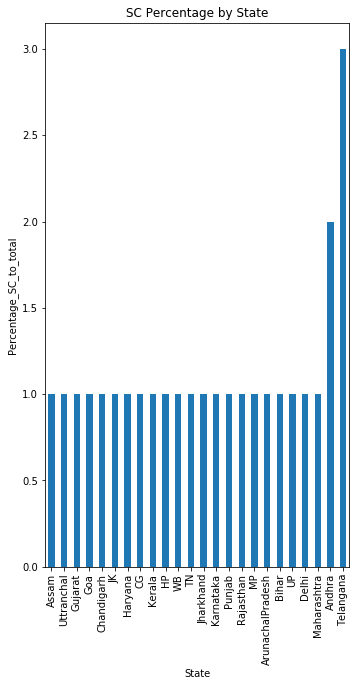

In [27]:
#a. Percentage of SC population by State:

temp1 = census_data['Percentage_SC_to_total'].value_counts(ascending=True)
temp2 = census_data['State'].value_counts(ascending=True)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(122)
ax1.set_xlabel('State')
ax1.set_ylabel('Percentage_SC_to_total')
ax1.set_title('SC percentage by State')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('State')
ax2.set_ylabel('Percentage_SC_to_total')
ax2.set_title('SC Percentage by State')

In [28]:
#b. Categorical variable analysis: 
# Note: here Economical status has been coded as 1 for Yes (Poor) and 0 for No (Not Poor). 

temp1 = df['Economical_Status'].value_counts(ascending=True)
temp2 = df.pivot_table(
        values='Scheduled_Caste_population',
        index='Economical_Status',
        aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Scheduled_Caste_population :') 
print (temp1)

Frequency Table for Scheduled_Caste_population :
0     7
1    20
Name: Economical_Status, dtype: int64


In [29]:
#Step 4: Building a Predictive Model in Python  
#Standard processing and Training/Test set Split
#Economical_Status 
x = df.loc[:, df.columns != 'Economical_Status']
y = df.loc[:, 'Economical_Status']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=7)

In [30]:
#1. #Generic function for making a classification model and accessing performance:

def classification_model(model, df, predictors, outcome):
    #Fit the model:
    model.fit(df[predictors],df[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(df[predictors])
    print('predictions data :', predictions) 

#    # evaluate each model in turn
# prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('RFC', RandomForestClassifier()))
    models.append(('NB', GaussianNB()))

#    # prepare configuration for cross validation test harness
    seed = 7
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

        #Fit the model again so that it can be refered outside the function:
        model.fit(df[predictors],df[outcome])  

In [31]:
#2. Logistic Regression
#Let’s make our first Logistic Regression model. 

outcome_var = 'Economical_Status'
model = LogisticRegression()
predictor_var = ['Urbal_Area']

classification_model(model, df, predictor_var, outcome_var)

predictions data : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.966667 (0.100000)
RFC: 0.816667 (0.240947)
NB: 0.733333 (0.238048)


In [32]:
#3. Logistic Regression

outcome_var = 'Economical_Status'
model = LogisticRegression()
predictor_var = ['Scheduled_Caste_population']

classification_model(model, df, predictor_var, outcome_var)

predictions data : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.916667 (0.170783)
RFC: 0.683333 (0.229129)
NB: 0.733333 (0.238048)


In [33]:
#4. Logistic Regression
#One way would be to take all the variables into the model 

outcome_var = 'Economical_Status'
model = LogisticRegression()
predictor_var = ['Urbal_Area','Scheduled_Caste_population']

classification_model(model, df, predictor_var, outcome_var)


predictions data : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.900000 (0.152753)
RFC: 0.783333 (0.279384)
NB: 0.733333 (0.238048)


In [34]:
#5. Logistic Regression
#We can try different combination of variables:
outcome_var = 'Economical_Status'
model = LogisticRegression()
predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers',
                 'Non_Workers','Percentage_Non_Workers']
classification_model(model, df,predictor_var,outcome_var)


predictions data : [1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.916667 (0.170783)
RFC: 0.750000 (0.343592)
NB: 0.733333 (0.238048)


In [35]:
#6. Decision Tree
#Decision Tree model is known to provide higher accuracy than logistic regression model.  
model = DecisionTreeClassifier()
outcome_var = 'Economical_Status'

predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers','Non_Workers']
classification_model(model, df,predictor_var,outcome_var)


predictions data : [1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.966667 (0.100000)
RFC: 0.916667 (0.170783)
NB: 0.733333 (0.238048)


In [36]:
#7. Decision Tree
#We can try different combination of variables:
model = DecisionTreeClassifier()
outcome_var = 'Economical_Status'

predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers',
                 'Non_Workers','Percentage_Non_Workers','Scheduled_Tribe_population']
classification_model(model, df,predictor_var,outcome_var)


predictions data : [1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.933333 (0.133333)
RFC: 0.816667 (0.240947)
NB: 0.733333 (0.238048)


In [37]:
#8. Random Forest
#Random forest is another algorithm for solving the classification problem.  
#An advantage with Random Forest is that we can make it work with all the features and 
#it returns a feature importance matrix which can be used to select features

outcome_var = 'Economical_Status'
model = RandomForestClassifier(n_estimators=20)
predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers','Non_Workers',
                 'Percentage_Non_Workers','Scheduled_Tribe_population']
classification_model(model, df,predictor_var,outcome_var)

predictions data : [1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.933333 (0.133333)
RFC: 0.850000 (0.240947)
NB: 0.733333 (0.238048)


In [38]:
#9. Random Forest
outcome_var = 'Economical_Status'
model = RandomForestClassifier(n_estimators=20, min_samples_split=20, max_depth=7, max_features=1)
predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers',
                 'Non_Workers','Percentage_Non_Workers']
classification_model(model, df,predictor_var,outcome_var)

predictions data : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
LR: 0.700000 (0.339935)
KNN: 0.700000 (0.305505)
DTC: 0.850000 (0.189297)
RFC: 0.750000 (0.260875)
NB: 0.733333 (0.238048)


In [39]:
#10. Create a series with feature importances:
#Fit the model:
model.fit(df[predictor_var],df[outcome_var])

featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)


Total_workers                 0.05
Scheduled_Caste_population    0.05
Persons                       0.05
Percentage_Non_Workers        0.00
Non_Workers                   0.00
Total_Educated                0.00
Growth_1991_2001              0.00
dtype: float64
